In [3]:
!git clone https://github.com/SayamAlt/Fake-Reviews-Detection.git

Cloning into 'Fake-Reviews-Detection'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 20 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 7.62 MiB | 4.62 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [4]:
import os
os.chdir('Fake-Reviews-Detection')

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import string, nltk
# Upgrade NLTK to the latest version
!pip install --upgrade nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download stopwords
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [6]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [8]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [9]:
df.isnull().sum()

,0
category,0
rating,0
label,0
text_,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [11]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [12]:
df['rating'].value_counts()

,count
rating,
5.0,24559
4.0,7965
3.0,3786
1.0,2155
2.0,1967


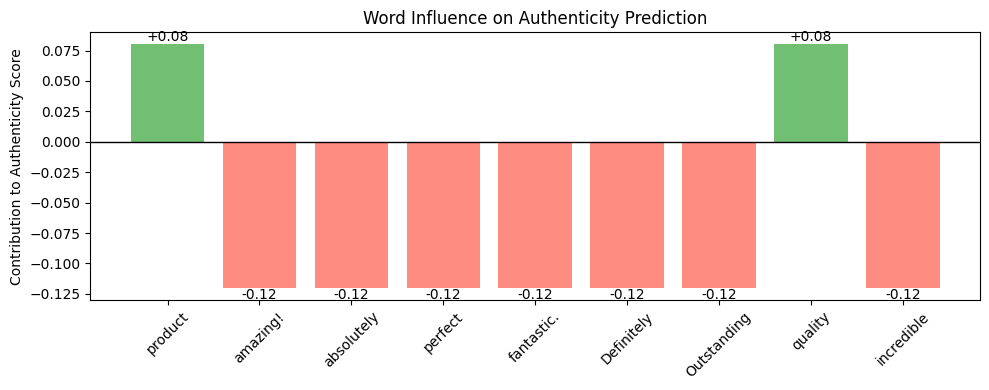

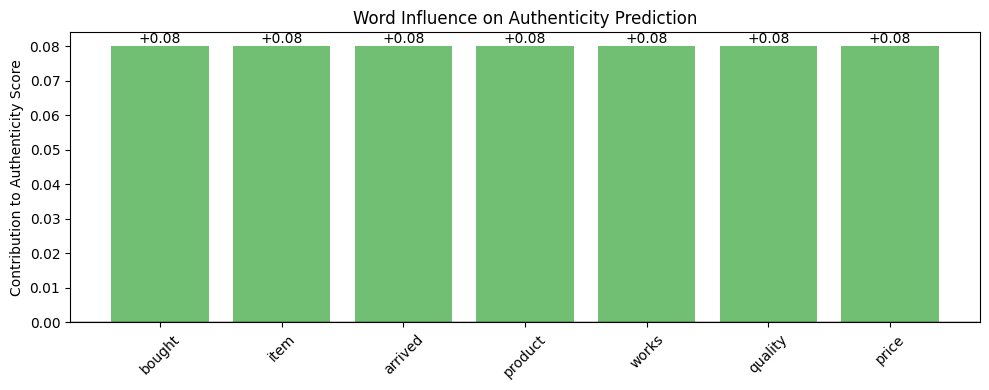

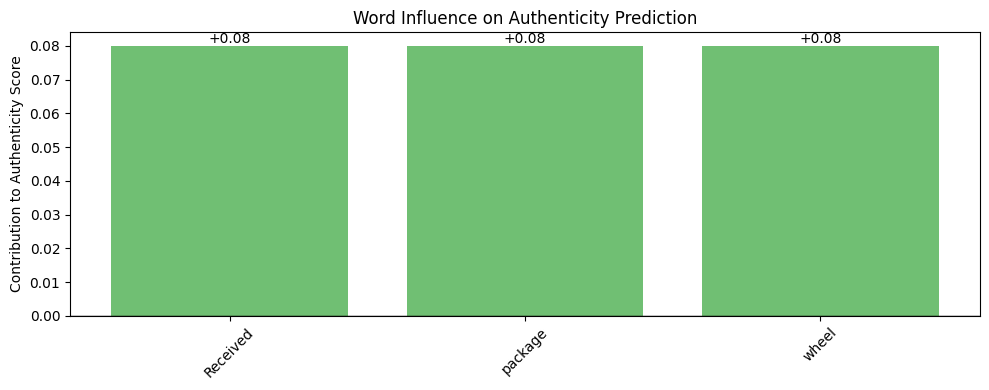

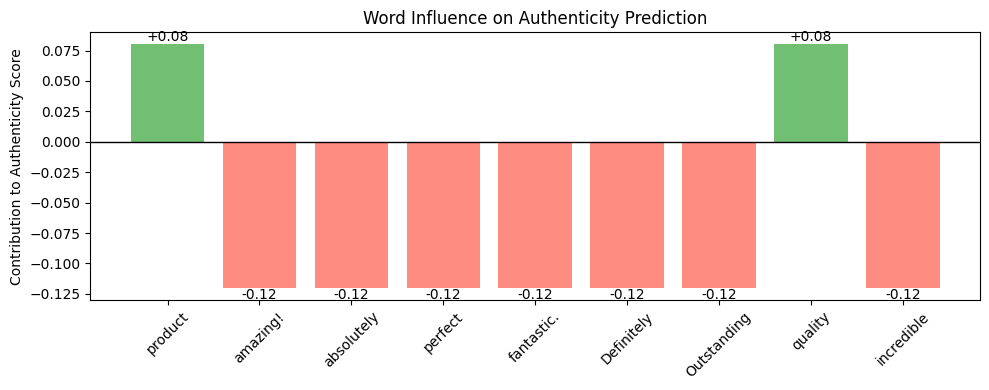

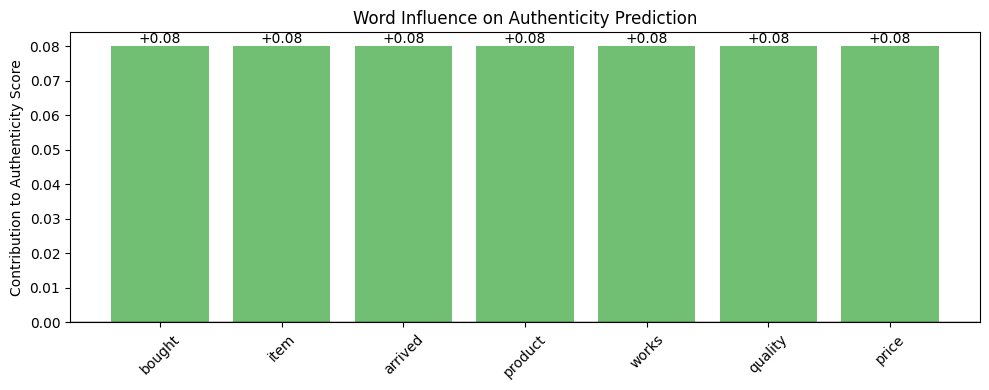

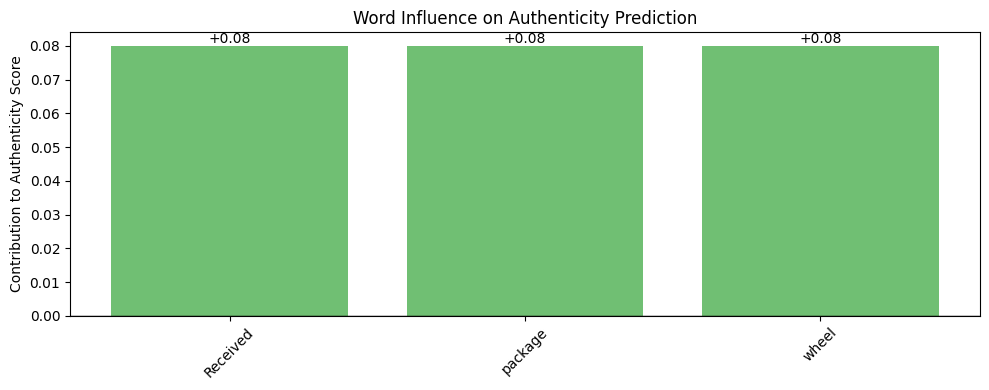

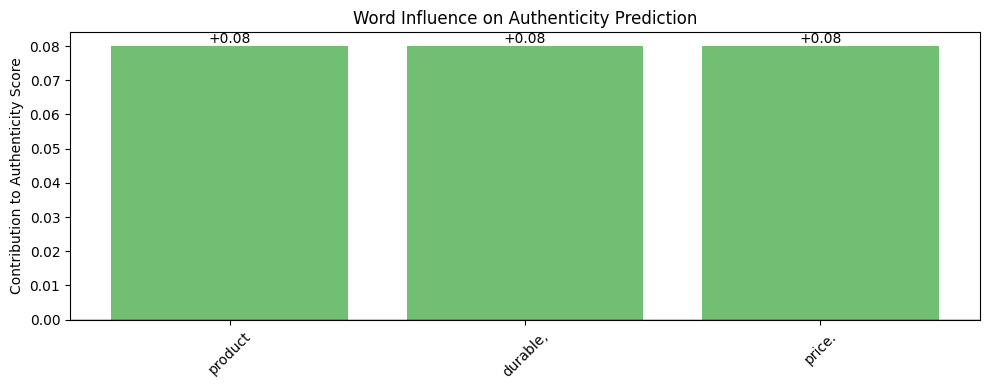

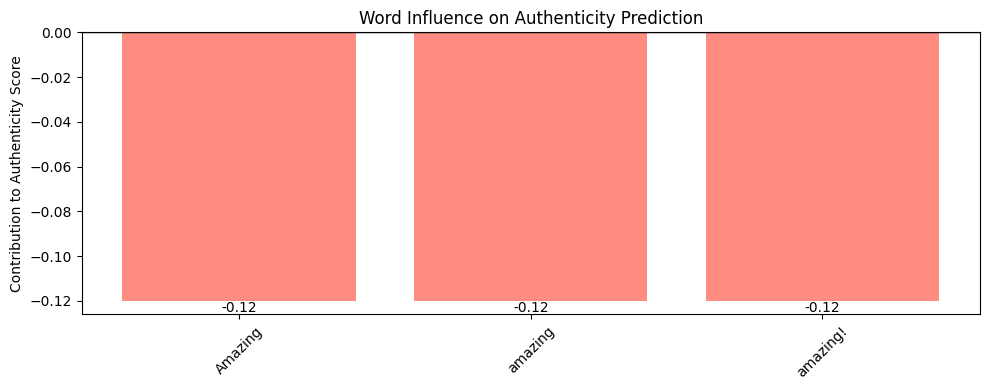

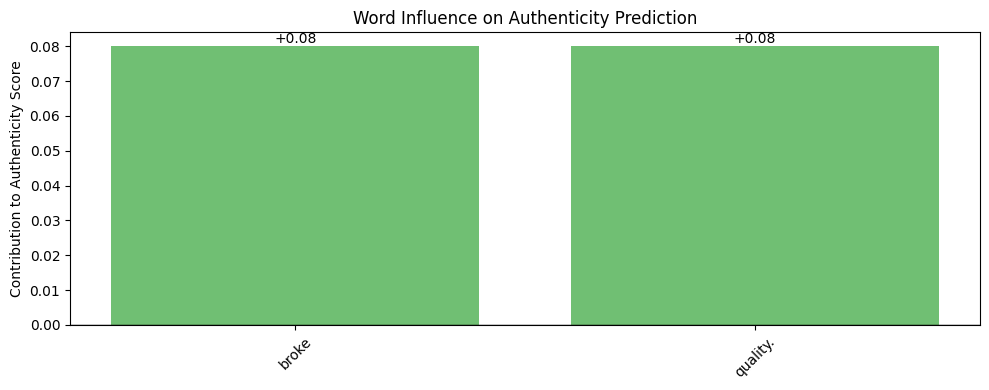

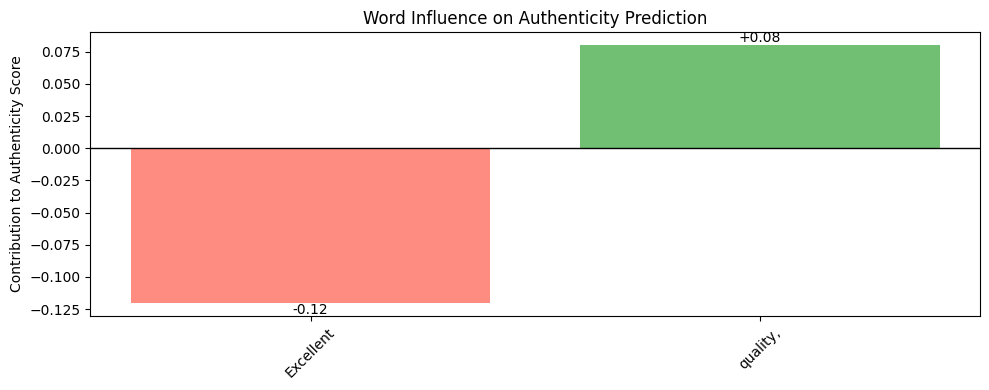

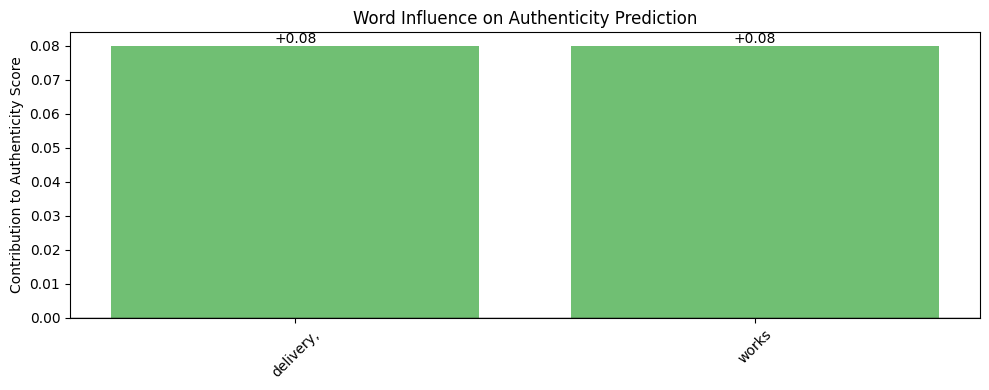

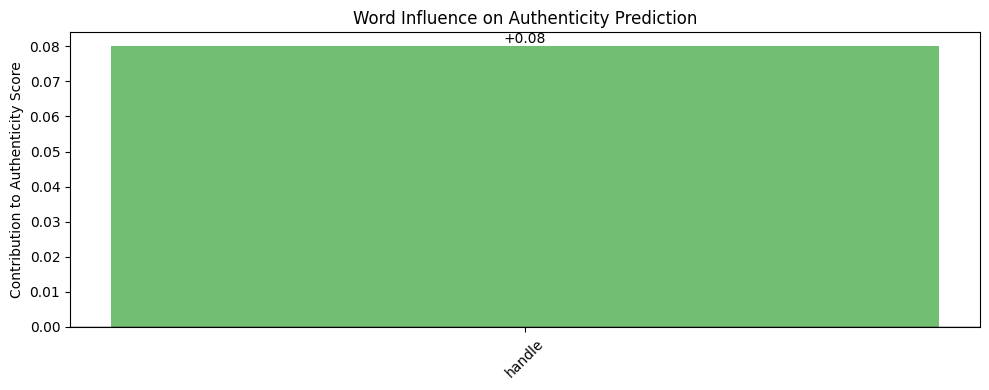

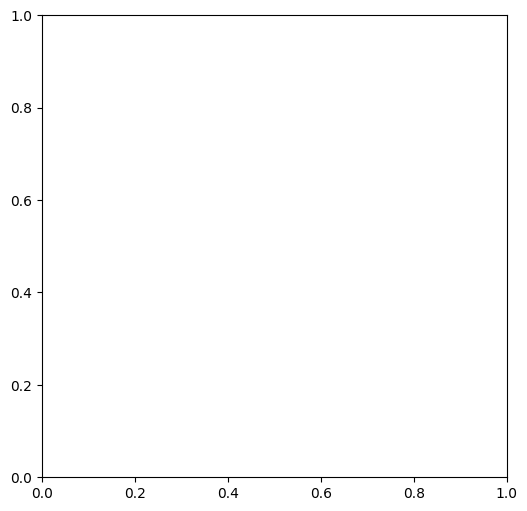

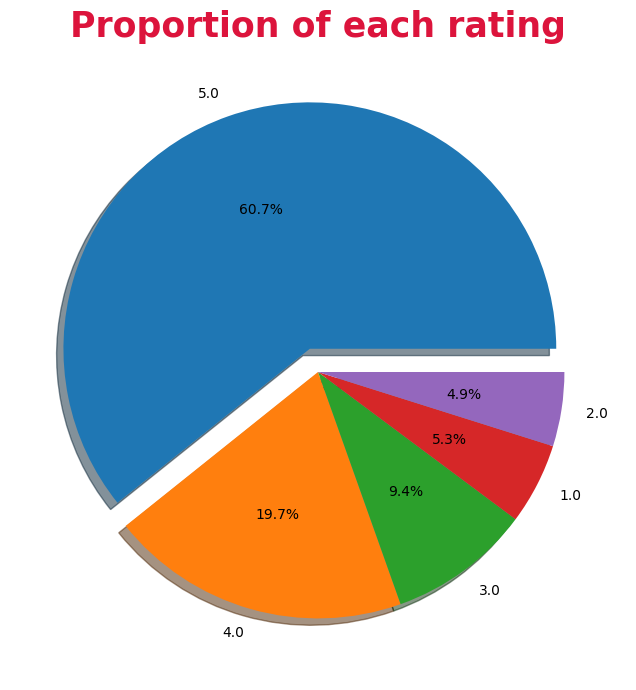

In [13]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [14]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [15]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [16]:
df['text_'].head().apply(clean_text)

,text_
0,Love Well made sturdy comfortable love itVery ...
1,love great upgrade original Ive mine couple years
2,pillow saved back love look feel pillow
3,Missing information use great product price
4,nice set Good quality set two months


In [17]:
df.shape

(40432, 4)

In [18]:
#df['text_'] = df['text_'].apply(clean_text)

In [19]:
df['text_'] = df['text_'].astype(str)

In [20]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [21]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [22]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
import nltk

def preprocess(text):
    return ' '.join([word for word in nltk.word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [24]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [25]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [26]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [27]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [28]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [29]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [30]:
df['text_'] = df['text_'].str.lower()

In [31]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [32]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [33]:
df['text_'].head()

,text_
0,love well made sturdi comfort i love veri pretti
1,love great upgrad origin i 've mine coupl year
2,thi pillow save back i love look feel pillow
3,miss inform use great product price i
4,veri nice set good qualiti we set two month


In [34]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset.csv')

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [36]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [37]:

df.drop('Unnamed: 0',axis=1,inplace=True)

In [38]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [39]:
df.dropna(inplace=True)

In [40]:
df['length'] = df['text_'].apply(len)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


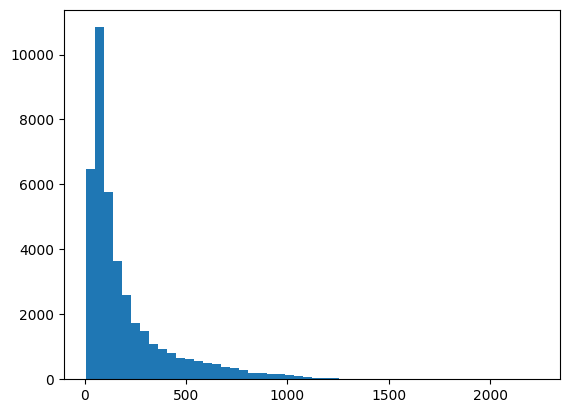

In [42]:
plt.hist(df['length'],bins=50)
plt.show()

In [43]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                 
             mean         std   min   25%    50%    75%     max  
label                                                            
CG     173.667623  173.991946  13.0  57.0   99.0  217.0  1300.0  
OR     237.979224  253.025990   8.0  74.0  134.0  296.0  2232.0

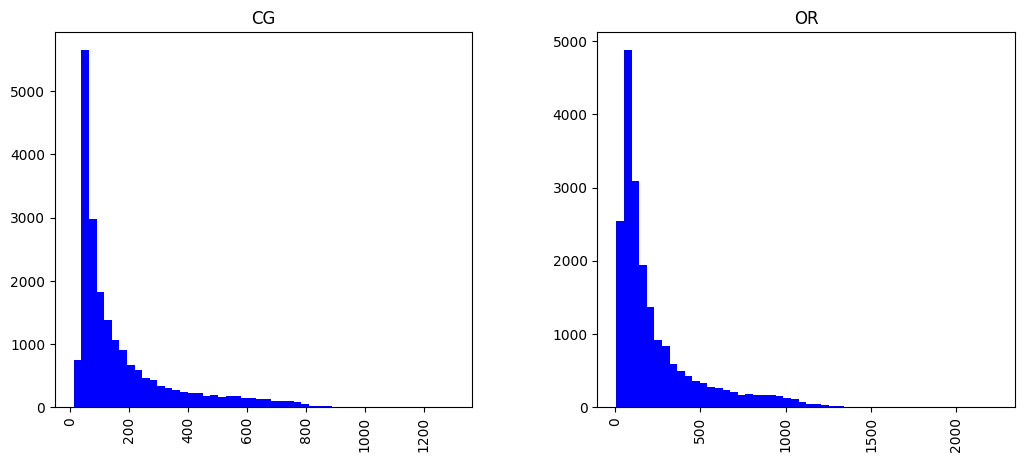

In [44]:
df['length'] = df['text_'].apply(len)
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

In [45]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [46]:
df.length.describe()

,length
count,40431.000000
mean,205.824219
std,219.501587
min,8.000000
25%,64.000000
50%,116.000000
75%,253.000000
max,2232.000000


In [47]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [48]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x7ad69c2707c0>)

In [49]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34462


In [50]:
review4 = df['text_'][3]
review4

'miss inform use great product price i'

In [51]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 34462)>
  Coords	Values
  (0, 13602)	1
  (0, 15844)	1
  (0, 19853)	1
  (0, 23854)	1
  (0, 23984)	1
  (0, 32191)	1
(1, 34462)


In [52]:
print(bow_transformer.get_feature_names_out()[15841])
print(bow_transformer.get_feature_names_out()[23848])

info
prevouo


In [53]:

bow_reviews = bow_transformer.transform(df['text_'])

In [54]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 34462)
Amount of non zero values in the bag of words model: 1013899


In [55]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [56]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 34462)>
  Coords	Values
  (0, 13602)	1
  (0, 15844)	1
  (0, 19853)	1
  (0, 23854)	1
  (0, 23984)	1
  (0, 32191)	1


In [57]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.821684385176731


In [58]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 34462)
No. of Dimensions: 2


In [59]:
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [61]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ad69c2707c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [62]:
predictions = pipeline.predict(review_test)
predictions

array(['OR', 'OR', 'CG', ..., 'CG', 'CG', 'CG'], dtype='<U2')

In [63]:
from sklearn.metrics import accuracy_score

print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.89      0.85      7050
          OR       0.88      0.80      0.84      7101

    accuracy                           0.84     14151
   macro avg       0.85      0.84      0.84     14151
weighted avg       0.85      0.84      0.84     14151

Confusion Matrix: [[6245  805]
 [1401 5700]]
Accuracy Score: 0.8441099568935058


In [64]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 84.41%


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [66]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ad69c2707c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [67]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['OR', 'OR', 'CG', ..., 'CG', 'OR', 'CG'], dtype=object)

In [68]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')


Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.88      0.84      7050
          OR       0.87      0.79      0.83      7101

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix: [[6220  830]
 [1492 5609]]
Accuracy Score: 0.8359126563493746
Model Prediction Accuracy: 83.59%


In [69]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [70]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ad69c2707c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [71]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['OR', 'OR', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [72]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.73      0.75      0.74      7050
          OR       0.74      0.72      0.73      7101

    accuracy                           0.73     14151
   macro avg       0.73      0.73      0.73     14151
weighted avg       0.73      0.73      0.73     14151

Confusion Matrix: [[5254 1796]
 [1968 5133]]
Accuracy Score: 0.7340117306197442
Model Prediction Accuracy: 73.4%


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [74]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ad69c2707c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [75]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [76]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.54      0.97      0.70      7050
          OR       0.87      0.19      0.31      7101

    accuracy                           0.58     14151
   macro avg       0.71      0.58      0.50     14151
weighted avg       0.71      0.58      0.50     14151

Confusion Matrix: [[6850  200]
 [5783 1318]]
Accuracy Score: 0.5772030245212353
Model Prediction Accuracy: 57.72%


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [78]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ad69c2707c0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [79]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'OR', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [80]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.90      0.86      0.88      7050
          OR       0.87      0.90      0.88      7101

    accuracy                           0.88     14151
   macro avg       0.88      0.88      0.88     14151
weighted avg       0.88      0.88      0.88     14151

Confusion Matrix: [[6082  968]
 [ 710 6391]]
Accuracy Score: 0.8814218076461028
Model Prediction Accuracy: 88.14%


In [81]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [82]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ad69c2707c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [83]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'OR', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [84]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.87      0.85      0.86      7050
          OR       0.85      0.88      0.86      7101

    accuracy                           0.86     14151
   macro avg       0.86      0.86      0.86     14151
weighted avg       0.86      0.86      0.86     14151

Confusion Matrix: [[5963 1087]
 [ 876 6225]]
Accuracy Score: 0.8612818882057806
Model Prediction Accuracy: 86.13%


In [85]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 86.13%
K Nearest Neighbors Prediction Accuracy: 57.72%
Decision Tree Classifier Prediction Accuracy: 73.4%
Random Forests Classifier Prediction Accuracy: 83.59%
Support Vector Machines Prediction Accuracy: 88.14%
Multinomial Naive Bayes Prediction Accuracy: 84.41%


In [86]:
!pip install gradio


In [89]:
import joblib

# Load your saved pipeline
# Make sure to save the pipeline after training
try:
    pipeline = joblib.load("review_pipeline.pkl")
except FileNotFoundError:
    print("Error: review_pipeline.pkl not found. Please ensure the pipeline is saved before loading.")
    # You might want to add code here to train and save the pipeline if it's not found
    # For now, we'll just pass to avoid stopping execution
    pass

Error: review_pipeline.pkl not found. Please ensure the pipeline is saved before loading.


In [90]:
import numpy as np
from textblob import TextBlob

def predict_review(text):
    # Vectorize
    X = vectorizer.transform([text])
    # Predict
    pred = model.predict(X)[0]
    proba = model.predict_proba(X)[0]

    # Sentiment
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0.1:
        sentiment = "Positive"
    elif sentiment_score < -0.1:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    # Explainability (basic: show top weighted words)
    feature_names = vectorizer.get_feature_names_out()
    coef = model.coef_[0]
    top_features = sorted(
        zip(X.toarray()[0], feature_names, coef),
        key=lambda x: abs(x[0]*x[2]),
        reverse=True
    )[:5]
    explanation = [f"{word} (weight {round(weight,3)})" for _, word, weight in top_features]

    return {
        "Prediction": "Real" if pred == 1 else "Fake",
        "Confidence": round(max(proba), 3),
        "Sentiment": sentiment,
        "Explanation": explanation
    }


In [91]:
import pandas as pd

def process_file(file):
    if file.name.endswith(".txt"):
        text = file.read().decode("utf-8")
        return predict_review(text)
    elif file.name.endswith(".csv"):
        df = pd.read_csv(file.name)
        results = []
        for review in df['review']:  # make sure column is "review"
            results.append(predict_review(review))
        return results
    else:
        return "Unsupported file format"


In [92]:
import gradio as gr

def main_fn(text, file):
    if text:
        return predict_review(text)
    elif file:
        return process_file(file)
    else:
        return "Please enter text or upload a file."

demo = gr.Interface(
    fn=main_fn,
    inputs=[
        gr.Textbox(label="Enter Review Text", placeholder="Type your review here..."),
        gr.File(label="Or Upload File (.txt or .csv)")
    ],
    outputs="json",
    title="Fake Review Detector",
    description="Upload a review or file to check if it's real or fake, along with sentiment analysis, confidence score, and explanation."
)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://876f03db6358d306ed.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [95]:
# Save the trained pipeline
joblib.dump(pipeline, "review_pipeline.pkl")
print("Pipeline saved successfully as review_pipeline.pkl")

Pipeline saved successfully as review_pipeline.pkl


In [97]:
import gradio as gr
import pandas as pd
from textblob import TextBlob
import random
import matplotlib.pyplot as plt

# ---- Keyword lists ----
original_keywords = ["bought", "delivery", "quality", "price", "packing", "durable", "handle", "wheel"]
cg_keywords = ["amazing", "definitely", "very very", "so good", "so nice", "value for money", "fantastic"]

# ---- Prediction Logic ----
def predict_review(text):
    text_lower = text.lower()

    # Prediction (dummy logic – replace later with ML)
    pred = "Original" if any(word in text_lower for word in original_keywords) else "Computer Generated"
    confidence = round(random.uniform(0.75, 0.95), 2)

    # Sentiment
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0.1:
        sentiment = "Positive"
    elif sentiment_score < -0.1:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    # ---- Explainability ----
    important_words = []
    explain_table = []
    word_contribs = {}

    for word in text.split():
        lw = word.lower().strip(",.!?")
        if lw in original_keywords:
            important_words.append((word, "positive"))
            explain_table.append([word, "Supports Original", "+0.2"])
            word_contribs[word] = 0.2
        elif lw in cg_keywords:
            important_words.append((word, "negative"))
            explain_table.append([word, "Suggests CG", "-0.2"])
            word_contribs[word] = -0.2

    if explain_table:
        explanation_text = (
            f"### Why this review is **{pred}**\n"
            f"The following keywords had the biggest impact on the decision:"
        )
    else:
        explanation_text = (
            f"### Why this review is **{pred}**\n"
            f"No strong keywords were found. The decision was made from the overall tone and writing style."
        )

    # ---- Word Contribution Bar Chart ----
    fig = None
    if word_contribs:
        fig, ax = plt.subplots(figsize=(5,3))
        words = list(word_contribs.keys())
        weights = list(word_contribs.values())
        colors = ["#4CAF50" if w > 0 else "#FF6F61" for w in weights]
        ax.bar(words, weights, color=colors)
        ax.axhline(0, color="black", linewidth=0.8)
        ax.set_ylabel("Contribution")
        ax.set_title("Word Influence on Prediction")

    return pred, confidence, sentiment, explanation_text, important_words, explain_table, fig

# ---- Main Function ----
def main_fn(text, file):
    if text:  # Single review
        return predict_review(text) + (None, "", None, None)
    elif file:  # Batch processing
        df = pd.read_csv(file.name)
        results = []
        for review in df['review']:
            pred, conf, sent, exp, _, _, _ = predict_review(str(review))
            results.append([review, pred, conf, sent])
        results_df = pd.DataFrame(results, columns=["Review", "Prediction", "Confidence", "Sentiment"])

        # ---- Summary ----
        summary = results_df["Prediction"].value_counts().to_dict()
        summary_text = f"**Summary:** {summary.get('Original',0)} Original | {summary.get('Computer Generated',0)} Computer Generated"

        # ---- Pie Chart for authenticity ----
        fig1, ax1 = plt.subplots(figsize=(4,4))
        labels = list(summary.keys())
        sizes = list(summary.values())
        colors = ["#4CAF50", "#FF6F61"]
        ax1.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90)
        ax1.axis("equal")

        # ---- Sentiment Distribution Chart ----
        fig2, ax2 = plt.subplots(figsize=(4,4))
        sent_counts = results_df["Sentiment"].value_counts()
        ax2.bar(sent_counts.index, sent_counts.values, color=["#4CAF50","#FFD700","#FF6F61"])
        ax2.set_title("Sentiment Distribution")
        ax2.set_ylabel("Count")

        return "", 0, "", "", [], [], None, results_df, summary_text, fig1, fig2
    else:
        return "No input", 0, "N/A", "⚠️ Please provide text or upload a file.", [], [], None, None, "", None, None

# ---- Clear Function ----
def clear_fn():
    return "", 0, "", "", [], [], None, None, "", None, None

# ---- Gradio UI ----
with gr.Blocks(css="""
    body {background: linear-gradient(135deg, #1e3c72, #2a5298);}
    .positive {background-color: #d4edda;}
    .negative {background-color: #f8d7da;}
    .gradio-container {color: white;}
    h1, p {color: white !important;}
""") as demo:
    gr.Markdown(
        "<h1 style='text-align:center;'>🌟 Review Authenticity Detector 🌟</h1>"
        "<p style='text-align:center;'>Detect whether a review is "
        "<b style='color:lightgreen;'>Original</b> or "
        "<b style='color:#ffcccc;'>Computer Generated</b>, with sentiment, confidence, explanations, and charts.</p>"
    )

    with gr.Row():
        text_in = gr.Textbox(label="✍️ Enter Review Text", placeholder="Type or paste a review here...")
        file_in = gr.File(label="📂 Or Upload File (.csv with column 'review')")

    with gr.Row():
        pred_out = gr.Textbox(label="🔎 Prediction", interactive=False)
        conf_out = gr.Slider(label="📊 Confidence Score", minimum=0, maximum=1, step=0.01, interactive=False)
        sent_out = gr.Textbox(label="😊 Sentiment", interactive=False)

    explain_out = gr.Markdown(label="📝 Explanation")
    highlight_out = gr.HighlightedText(label="🔦 Key Words")

    with gr.Tab("📖 Word Influence Table"):
        explain_table = gr.DataFrame(headers=["Word", "Effect", "Weight"], interactive=False)
    with gr.Tab("📊 Word Contribution Chart"):
        word_chart = gr.Plot()

    with gr.Row():
        table_out = gr.DataFrame(label="📑 Batch Results", interactive=False)
    with gr.Row():
        summary_out = gr.Markdown(label="📊 Summary")
    with gr.Row():
        chart_out = gr.Plot(label="📊 Review Distribution (Original vs CG)")
        sentiment_chart = gr.Plot(label="📊 Sentiment Distribution")

    with gr.Row():
        run_btn = gr.Button("🚀 Analyze Review", variant="primary")
        clear_btn = gr.Button("🧹 Clear", variant="secondary")

    run_btn.click(
        fn=main_fn,
        inputs=[text_in, file_in],
        outputs=[pred_out, conf_out, sent_out, explain_out, highlight_out, explain_table, word_chart, table_out, summary_out, chart_out, sentiment_chart]
    )

    clear_btn.click(
        fn=clear_fn,
        inputs=[],
        outputs=[pred_out, conf_out, sent_out, explain_out, highlight_out, explain_table, word_chart, table_out, summary_out, chart_out, sentiment_chart]
    )

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d44c0fde4ccab19639.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
